Source: [ML-For-Beginners](https://github.com/chewzzz1014/ML-For-Beginners) Curriculum by Microsoft (on Github) Lesson 2.3

## Basic Linear Regression and Polynomial Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Data Cleaning (Same as in [MLFB-plotting.ipynb](https://github.com/chewzzz1014/python-libraries/blob/master/plt-sns/MLFB-plotting.ipynb))

In [2]:
path = "https://raw.githubusercontent.com/chewzzz1014/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv"
pumpkins = pd.read_csv(path)

In [5]:
from datetime import datetime

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


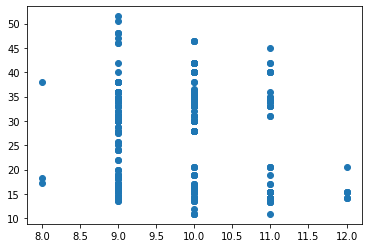

In [6]:
plt.scatter('Month','Price',data=new_pumpkins);

Questions:
- When is the best time to buy pumpkins?
- What price can I expect of a case of miniature pumpkins?
- Should I buy them in half-bushel baskets or by the 1 1/9 bushel box? Let's keep digging into this data.

## Linear Regression Line
- To show variable relationships and make predictions
- Least-Squares Regression:
  - All datapoints surrounding the regression line are squared and then added up
  - Final sum is as small as possible, because we want a low number of errors, or least-squares.
  -  model a line that has the least cumulative distance from all of our data points. We also square the terms before adding them since we are concerned with its magnitude rather than its direction.

## Correlation
- Correlation Coefficient between given X and Y variables
- A plot with datapoints scattered in a neat line have high correlation, but a plot with datapoints scattered everywhere between X and Y have a low correlation.
- A good linear regression model will be one that has a high (nearer to 1 than 0) Correlation Coefficient using the Least-Squares Regression method with a line of regression.

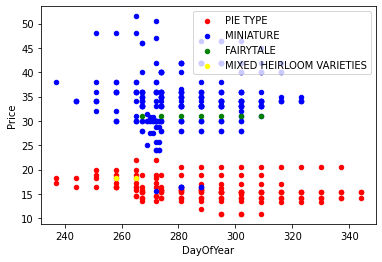

In [7]:
# visualize the correlation and predict the relationship betweens Month and Price or DayOfYear and Price
ax = None
colors = ['red','blue','green','yellow']

# plot w/ diff colors based on variety
for i, var in enumerate(new_pumpkins["Variety"].unique()):
    df = new_pumpkins[new_pumpkins["Variety"]==var]
    ax = df.plot.scatter("DayOfYear", "Price", ax=ax, c=colors[i], label=var)

Observation: Variety has more effect on overall price than actual selling date.

## Simple Linear Regression

In [9]:
# focus on one variety only
pie_pumpkins = new_pumpkins[new_pumpkins["Variety"]=="PIE TYPE"]
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayOfYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   City        144 non-null    object 
 4   Package     144 non-null    object 
 5   Low Price   144 non-null    float64
 6   High Price  144 non-null    float64
 7   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 10.1+ KB


C:\Users\USER\AppData\Local\Temp\ipykernel_46068\2283207789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [13]:
# linear regression expects 2D array as input where each row of array corresponds to a vector of input features
X = pie_pumpkins["DayOfYear"].to_numpy().reshape(-1, 1)
y = pie_pumpkins["Price"]

In [16]:
# split into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (115, 1)
X_test Shape: (29, 1)
y_train Shape: (115,)
y_test Shape: (29,)


In [17]:
# train model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [19]:
#coefficients of regression
lin_reg.coef_

array([-0.02449803])

**Observation: It means that prices seem to drop a bit with time, but not too much, around 2 cents per day.** 

In [20]:
# intercept point of regression
lin_reg.intercept_

23.119906708317842

**Observation: indicating the price at the beginning of the year.**

### Evaluation

In [23]:
# evaluate prediction using mse, mean_squared_error
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test, pred))
print(f"Mean Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3%})")

Mean Error: 2.34 (1464.605%)


In [25]:
# coefficient of determination
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.07976792054910442


**If the value is 0, it means that the model does not take input data into account, and acts as the worst linear predictor, which is simply a mean value of the result. The value of 1 means that we can perfectly predict all expected outputs. In our case, the coefficient is around 0.08, which is quite low.**

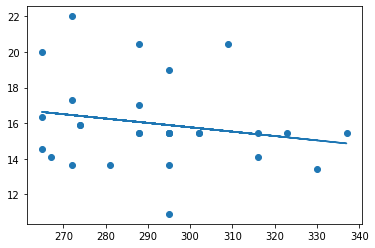

In [27]:
plt.scatter(X_test, y_test)
plt.plot(X_test, pred);

## Polynomial Regression
- When the relationships can't be plotted as plane or straight line.
- creates a curved line to better fit nonlinear data. 

1. Create a pipeline that first adds polynomial features to our model
2. Train Regression

In [28]:
# create pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# PolynomialFeatures(2): include all second-degree polynomials from input data
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

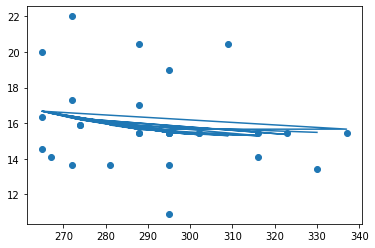

In [31]:
pred = pipeline.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, pred);

## Categorical Features
- Convert categorical features to numerical form
1. **Simple numeric encoding** 
   - build a table of different varieties, and then replace the variety name by an index in that table. 
   - This is not the best idea for linear regression, because linear regression takes the actual numeric value of the index, and adds it to the result, multiplying by some coefficient.

2. **One-hot Encoding**
   - Assume that a categorical column X, has n possible values
   - Replace X by n different columns, one for each variety. Each column will contain 1 if the corresponding row is of a given variety, and 0 otherwise.
   - There will be n coefficients in linear regression,

In [33]:
# one-hot encoding
pd.get_dummies(new_pumpkins["Variety"])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [34]:
# using one-hot encoded variety as input

X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

**- mse is about the same, but we get much higher coefficient of determination**

**- To get even more accurate predictions, we can take more categorical features into account, as well as numeric features, such as Month or DayOfYear. To get one large array of features, we can use join**


In [35]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

## One-hot Encoded Categorical + Polynomial Regression

In [36]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# set up and train pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [42]:
pred = pipeline.predict(X_test)

In [45]:
mse = np.sqrt(mean_squared_error(y_test, pred))
print(f"Mean Error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)")

Mean Error: 3.76e+11 (-9.11e+02%)


In [46]:
score = pipeline.score(X_train, y_train)
print(f"Model Determination: ", score)

Model Determination:  0.9550664450308249
